# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

# Extract desired Stock data from yfinance

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

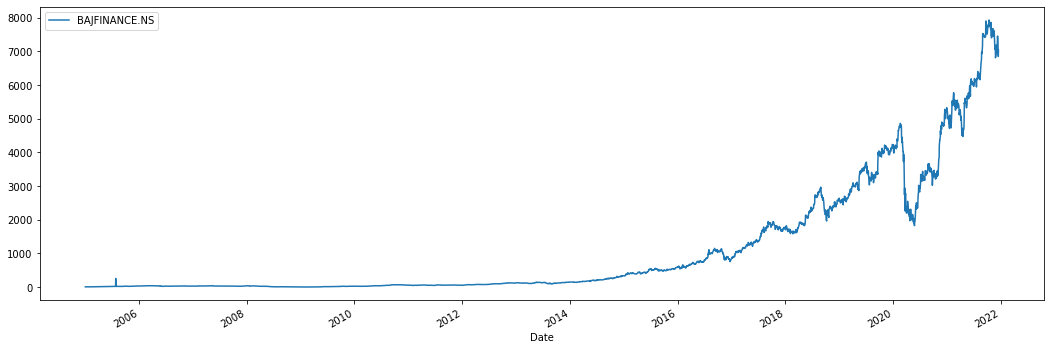

In [2]:
ticker = ('BAJFINANCE.NS')
stock_data = pd.DataFrame() 
stock_data[ticker]= yf.download(ticker,start='2005-01-01',end= '2021-12-17')['Adj Close']
#Plot Amazon Stock 
stock_data.plot(figsize=(18,6))


# calculate hitorical log returns

<AxesSubplot:ylabel='Density'>

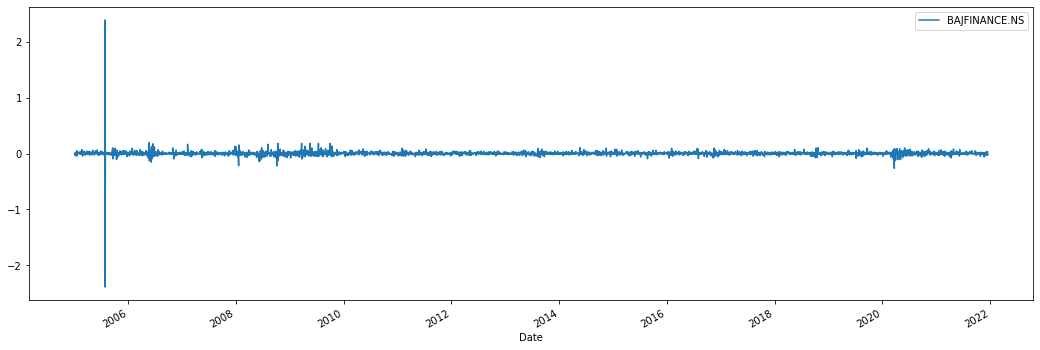

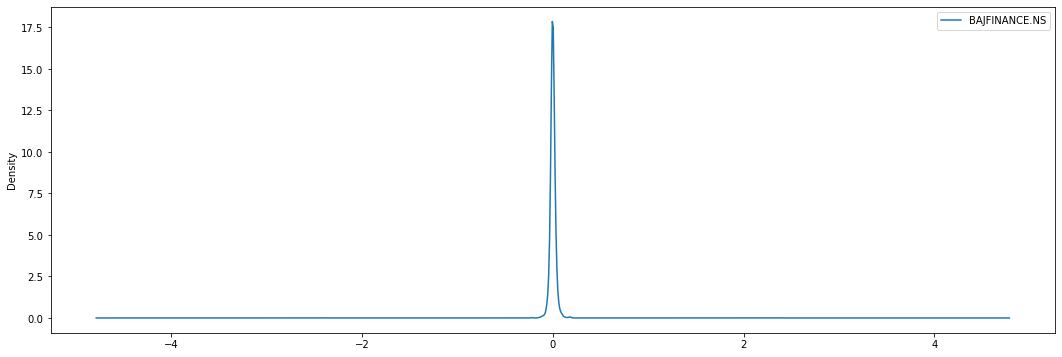

In [3]:
log_return = np.log(1+stock_data.pct_change())
#show all the log return
log_return.plot(figsize=(18,6))
#Show the distribution of the log return
log_return.plot.density(figsize=(18,6))

# Calculate key statistical measures

In [4]:
mean = log_return.mean()
variance = log_return.var()
standard_deviation = log_return.std()
drift = mean - (0.5 * variance) 

# Explain np.random.rand

In [5]:
test1 = np.random.rand(2,5)
test1

array([[0.76914711, 0.015624  , 0.56981925, 0.32118833, 0.37401797],
       [0.29448536, 0.41154127, 0.55751081, 0.13440361, 0.67265943]])

# Explain norm.ppf

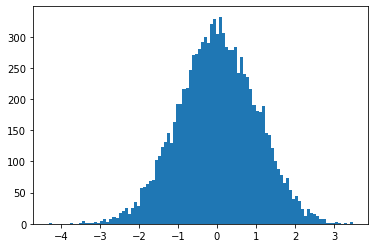

In [6]:
test2 = norm.ppf(np.random.rand(10000))
plt.hist(test2, bins = 100);

# Forecast future daily returns

In [7]:
t_interval = 250
simulate = 10000
daily_simulatedreturns = np.exp(drift.values + standard_deviation.values * norm.ppf(np.random.rand(t_interval,simulate)))
daily_simulatedreturns

array([[1.09794658, 1.03703096, 0.91783142, ..., 0.98823925, 1.02306909,
        0.91068192],
       [1.03774536, 1.09602777, 1.12778861, ..., 1.02443347, 1.0094703 ,
        1.08168928],
       [0.98687059, 0.98867006, 1.11107808, ..., 1.00826415, 1.06726931,
        1.00584281],
       ...,
       [1.15833144, 1.04080554, 1.06366822, ..., 1.09562353, 0.97644496,
        0.95975544],
       [0.93753119, 1.03677742, 1.00427128, ..., 0.91489168, 0.97495225,
        1.11230777],
       [0.9937011 , 0.99746672, 1.00493536, ..., 0.90451018, 1.00168905,
        1.0306165 ]])

# Create the variable for the latest price of Bajaj Finance Stock

In [8]:
last_price = stock_data.iloc[-1]

#prepare an array for the price simulation
price_list = np.zeros_like(daily_simulatedreturns)

#set the first row to the starting stdck price 
price_list[0] = last_price
price_list

array([[7028.85009766, 7028.85009766, 7028.85009766, ..., 7028.85009766,
        7028.85009766, 7028.85009766],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

# Monte Carlo Simultaion

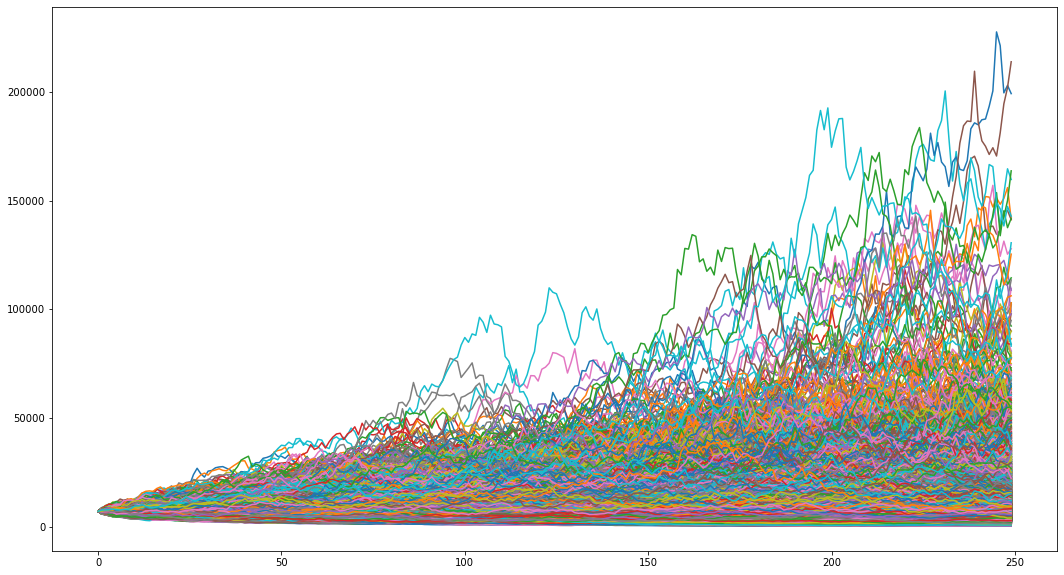

In [12]:
from matplotlib.pyplot import figure
for t in range(1, t_interval):
    price_list[t] = price_list[t-1] * daily_simulatedreturns[t]
# plot the the graph of future 10,000 prices
figure(figsize=(18,10))
plt.plot(price_list);


# Example of Bull, Bear & Base case scenario

# Bear Case

In [15]:
print ("Bear Case Share Price:")
round(price_list.min())


Bear Case Share Price:


169

# Bull Case

In [18]:
print ("Bull Case Share Price:")
round(price_list.max())

Bull Case Share Price:


399841

# Average Case

In [21]:
print ("Average Case Share Price:")
round(price_list.mean())

Average Case Share Price:


8569

# Set up confidence intervals

In [22]:
upper68 = price_list[-1].mean() + price_list[1].std()
lower68 = price_list[-1].mean() - price_list[1].std()
upper95 = price_list[-1].mean() + price_list[1].std()*2
lower95 = price_list[-1].mean() - price_list[1].std()*2

# Print the values 68%  Upper Price range

In [24]:
print("68% Price Range upper")
round(upper68)

68% Price Range upper


10783

# Print the values 68%  Lower Price range

In [25]:
print("68% Price Range Lower")
round(lower68)

68% Price Range Lower


9947

# print the values 95% Higher Price range

In [28]:
print("95% Price Range upper")
round(upper95)

95% Price Range upper


11200

# print the values 95% Lower Price range

In [29]:
print("95% Price Range upper")
round(lower95)

95% Price Range upper


9529